## Step 1: Init Env
initializing the environment by importing the modules and defining the default S3 bucket used by SageMaker Studio.

In [40]:
import sagemaker
import boto3
import pandas as pd
import numpy as np
import os
from sagemaker import get_execution_role
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#import cv2
import tqdm

tqdmregion = boto3.Session().region_name
 
session = sagemaker.Session()
bucket = session.default_bucket()
print(bucket)
prefix = 'sagemaker/termdepo'
 
role = get_execution_role()
region = boto3.Session().region_name 
sm = boto3.Session().client(service_name='sagemaker',region_name=region)

sagemaker-us-east-2-212114479343


## Step 2: Data Preparation
Import, Flatten and split data

In [ ]:
## Copy data from S3 to Sagemaker studio workspace
#aws s3 sync s3://aim-da-datascience/aim-image-rec-demo/flowers /home/sagemaker-user/image_recog_demo/data/

In [41]:
#Function and Contstant defition
def assign_label ( img , flower_type ) :
    return flower_type


def make_train_data ( flower_type , DIR ) :
    for img in tqdm ( os.listdir ( DIR ) ) :
        label = assign_label ( img , flower_type )
        path = os.path.join ( DIR , img )
        img = cv2.imread ( path , cv2.IMREAD_COLOR )
        img = cv2.resize ( img , (IMG_SIZE , IMG_SIZE) )

        X.append ( np.array ( img ) )
        Z.append ( str ( label ) )

RANDOM_STATE = 42

In [45]:
# Import Data
X = [ ]
Z = [ ]
IMG_SIZE = 150

FLOWER_DAISY_DIR = '/home/sagemaker-user/image_recog_demo/data/daisy'
FLOWER_SUNFLOWER_DIR = '/home/sagemaker-user/image_recog_demo/data/sunflower'
FLOWER_ROSE_DIR = '/home/sagemaker-user/image_recog_demo/data/rose'

make_train_data ( 'Daisy' , FLOWER_DAISY_DIR )
make_train_data ( 'Sunflower' , FLOWER_SUNFLOWER_DIR )
make_train_data ( 'Rose' , FLOWER_ROSE_DIR )    

In [46]:
## Create Train and test Sets
le = LabelEncoder ( )
Y = le.fit_transform ( Z )
Y = to_categorical ( Y , 5 )
X = np.array ( X )
X = X / 255
x_train , x_test , y_train , y_test = train_test_split (
    X , Y , test_size = 0.25 , random_state = RANDOM_STATE )

#flatten 2d array into 1D row ammenable for tbs/cvs
cv2.flatten(x_train)
cv2.flatten(X_test)

#save as df, because its easy
flowers_train = pd.DataFrame(x_train)
flowers_train['class'] = y_train
flowers_test = pd.DataFrame(x_test)
flowers_test['class'] = y_test

## Step 2.5: Write flattened train & test sets out to S3
without this step one will be unable to utlize sagemakers experiment 'auto pilot'

In [ ]:
train_file = 'flowers_train.csv';
flowers_train.to_csv(train_file, index=False, header=True)
train_data_s3_path = session.upload_data(path=train_file, key_prefix=prefix + "/train")
 
test_file = 'flowers_test.csv';
test_data.to_csv(test_file, index=False, header=False)
test_data_s3_path = session.upload_data(path=test_file, key_prefix=prefix + "/test")
print('Test dataset uploaded to: ' + test_data_s3_path)

## Step 3: Run experiements
## Step 4: Create & Deploy Endpoint
## Step 5: Test Endpoint

daisy,"['daisy', 'rose', 'sunflower']",0.9930002689361572



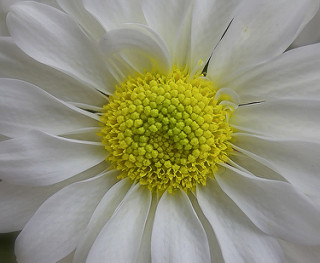

In [52]:
sm_rt = boto3.Session().client('runtime.sagemaker', region_name=region)
p1 = open('./p1.txt','r')
p1 = str(p1.read())
ep_name="flowers-final"
response = sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=p1)
response = response['Body'].read().decode("utf-8")
print (response)

from IPython.display import Image
Image(filename='val_daisy_raw.jpg') 

sunflower,"['daisy', 'rose', 'sunflower']",0.9275056719779968



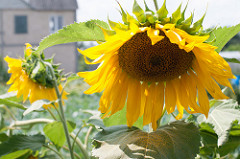

In [53]:
p2 = open('./p2.txt','r')
p2 = str(p2.read())
ep_name="flowers-final"
response = sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=p2)
response = response['Body'].read().decode("utf-8")
print (response)

Image(filename='val_sunflow_raw.jpg') 

rose,"['daisy', 'rose', 'sunflower']",0.5245454907417297



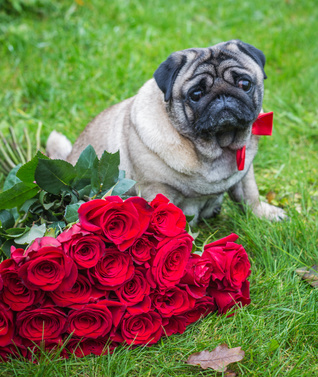

In [54]:
p3 = open('./p3.txt','r')
p3 = str(p3.read())
ep_name="flowers-final"
response = sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=p3)
response = response['Body'].read().decode("utf-8")
print (response)

Image(filename='val_roses_raw.jpg') 